In [105]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

import xgboost as xgb
from lightgbm import LGBMRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

from scipy import stats
from scipy.stats import skew

import seaborn as sns
import matplotlib.pyplot as plt



seed = 42

In [106]:
pd.set_option('display.max_rows', None)

In [107]:
train = pd.read_csv('train.csv', low_memory=False)
test = pd.read_csv('test.csv', low_memory=False)

In [108]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


### EDA

In [109]:
# list of categorical columns
categoric = [f for f in train.columns if train.dtypes[f] == 'object']

# list of numerical columns wihout ID and SalePrice
numeric = [f for f in train.columns if train.dtypes[f] != 'object']
numeric.remove('SalePrice')
numeric.remove('Id')

print('there are: ' + str(len(numeric)) + ' numeric features:' + str(numeric))
print('there are: ' + str(len(categoric)) + ' numeric features:' + str(categoric))

there are: 36 numeric features:['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
there are: 43 numeric features:['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Firepl

In [110]:
# shape of datasets
print ('train dataset shape is:' +str(train.shape))
print ('train dataset shape is:' +str(test.shape))

train dataset shape is:(1460, 81)
train dataset shape is:(1459, 80)


In [111]:
# dtypes of both datasets (they have the same features so we will print only the train dataset)
print('dtypes of datasets are:' + str(train.dtypes))

dtypes of datasets are:Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
He

In [112]:
# description of numerical variables in the train dataset
train[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


<AxesSubplot:>

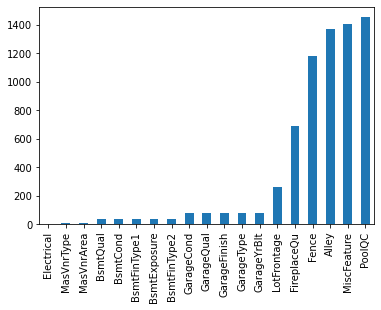

In [113]:
# Cheking for null values

null = train.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.bar()

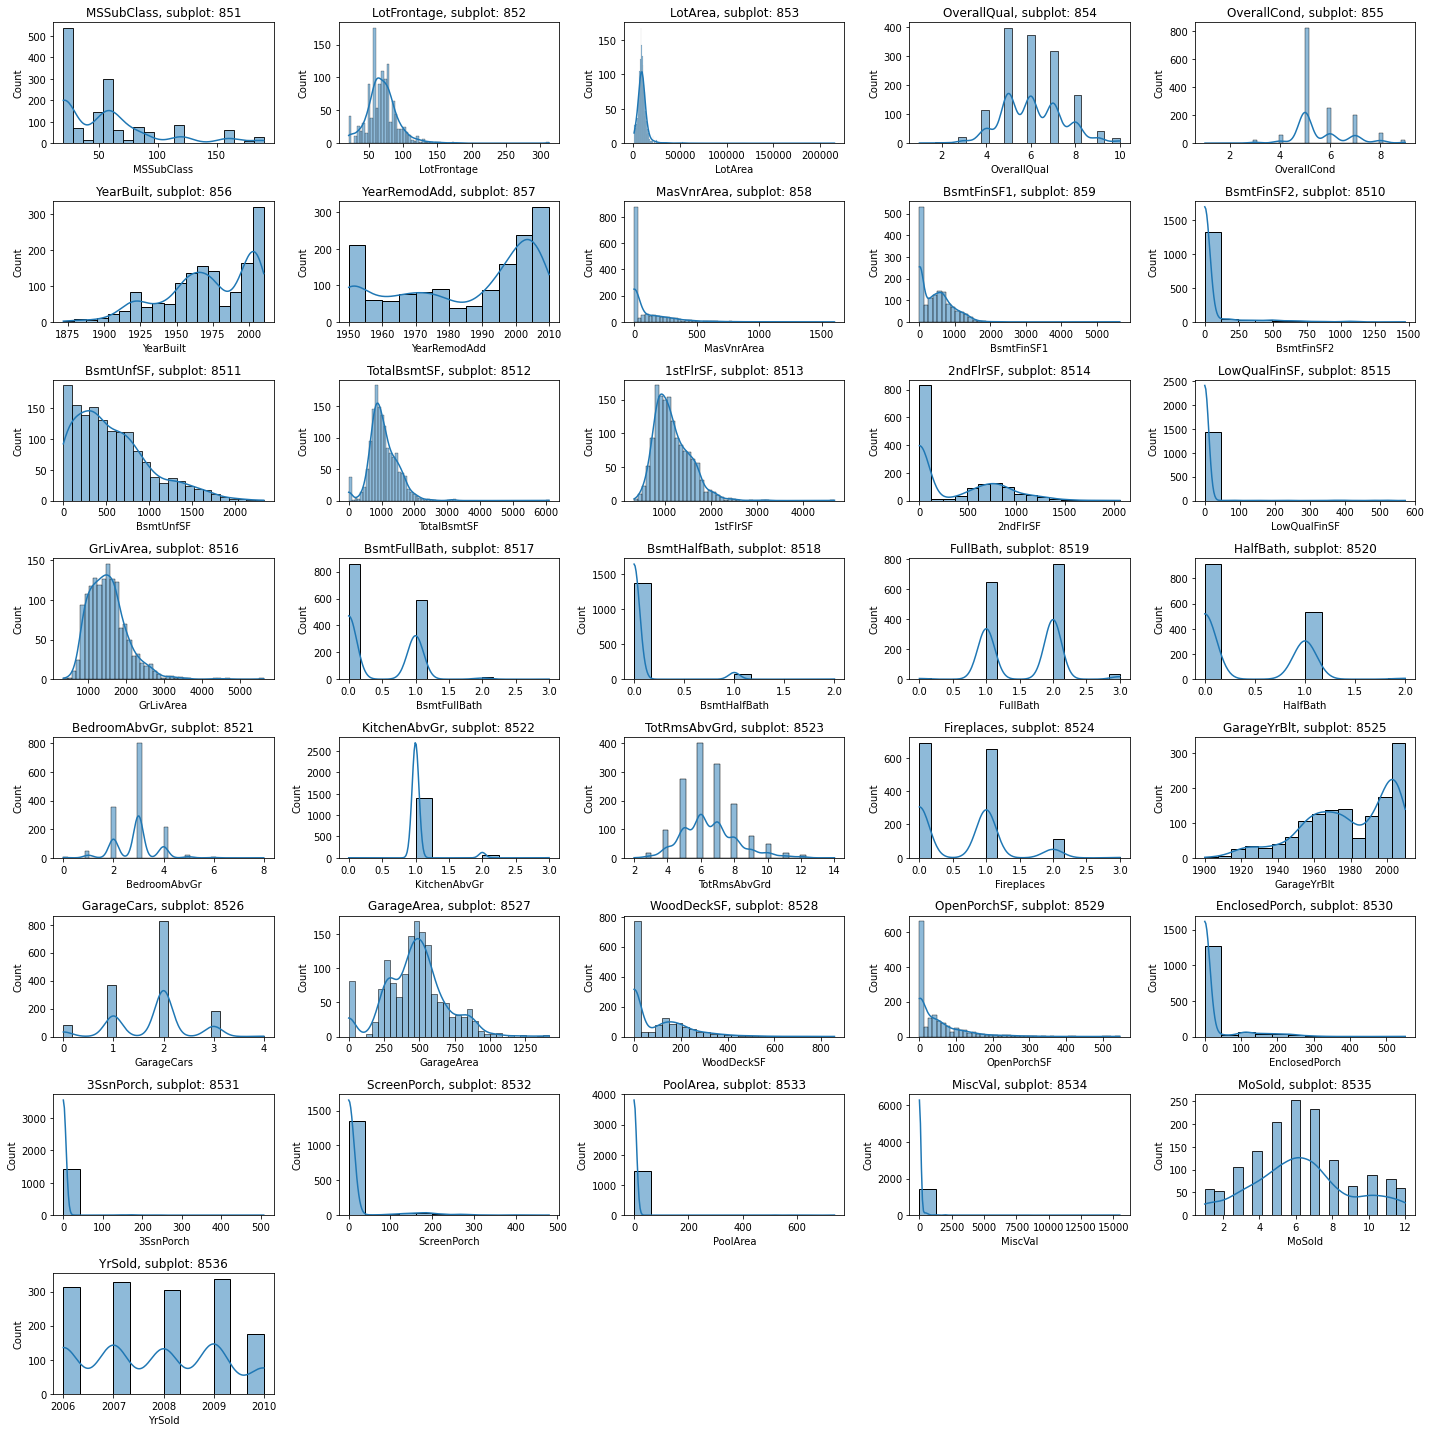

In [114]:
# Destribution of numeric variables

a = 8  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))

for col in train[numeric]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(col, a, b, c))
    plt.xlabel(col)
    #plt.hist(x=train[col], bins=25, color='grey')
    sns.histplot(data=train[numeric], x=col, kde=True)
    
    c = c + 1
plt.tight_layout()
plt.show()

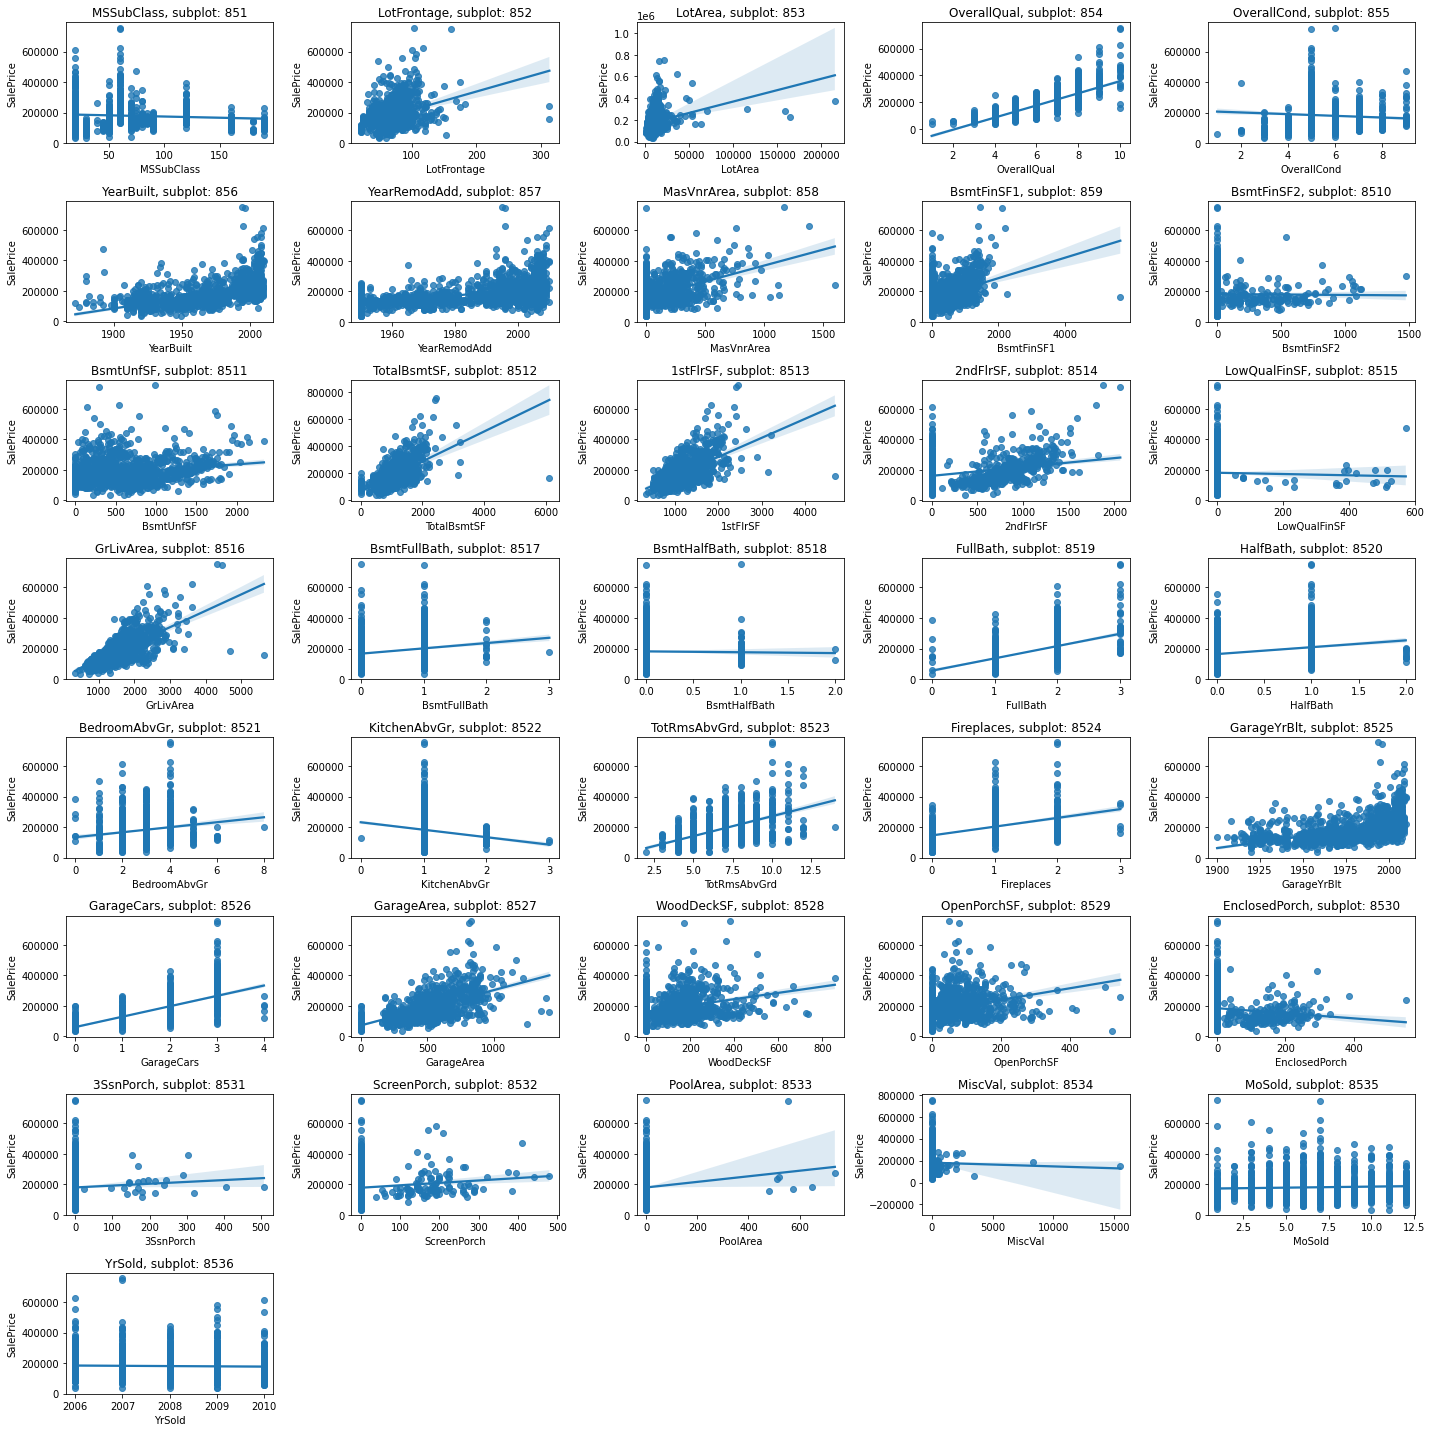

In [115]:
# Scatter plots of numeric variables with SalePrice with best fit line

a = 8  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))

for col in train[numeric]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(col, a, b, c))
    plt.xlabel(col)
    sns.regplot(x=col, y='SalePrice', data=train)
    
    c = c + 1
plt.tight_layout()
plt.show()

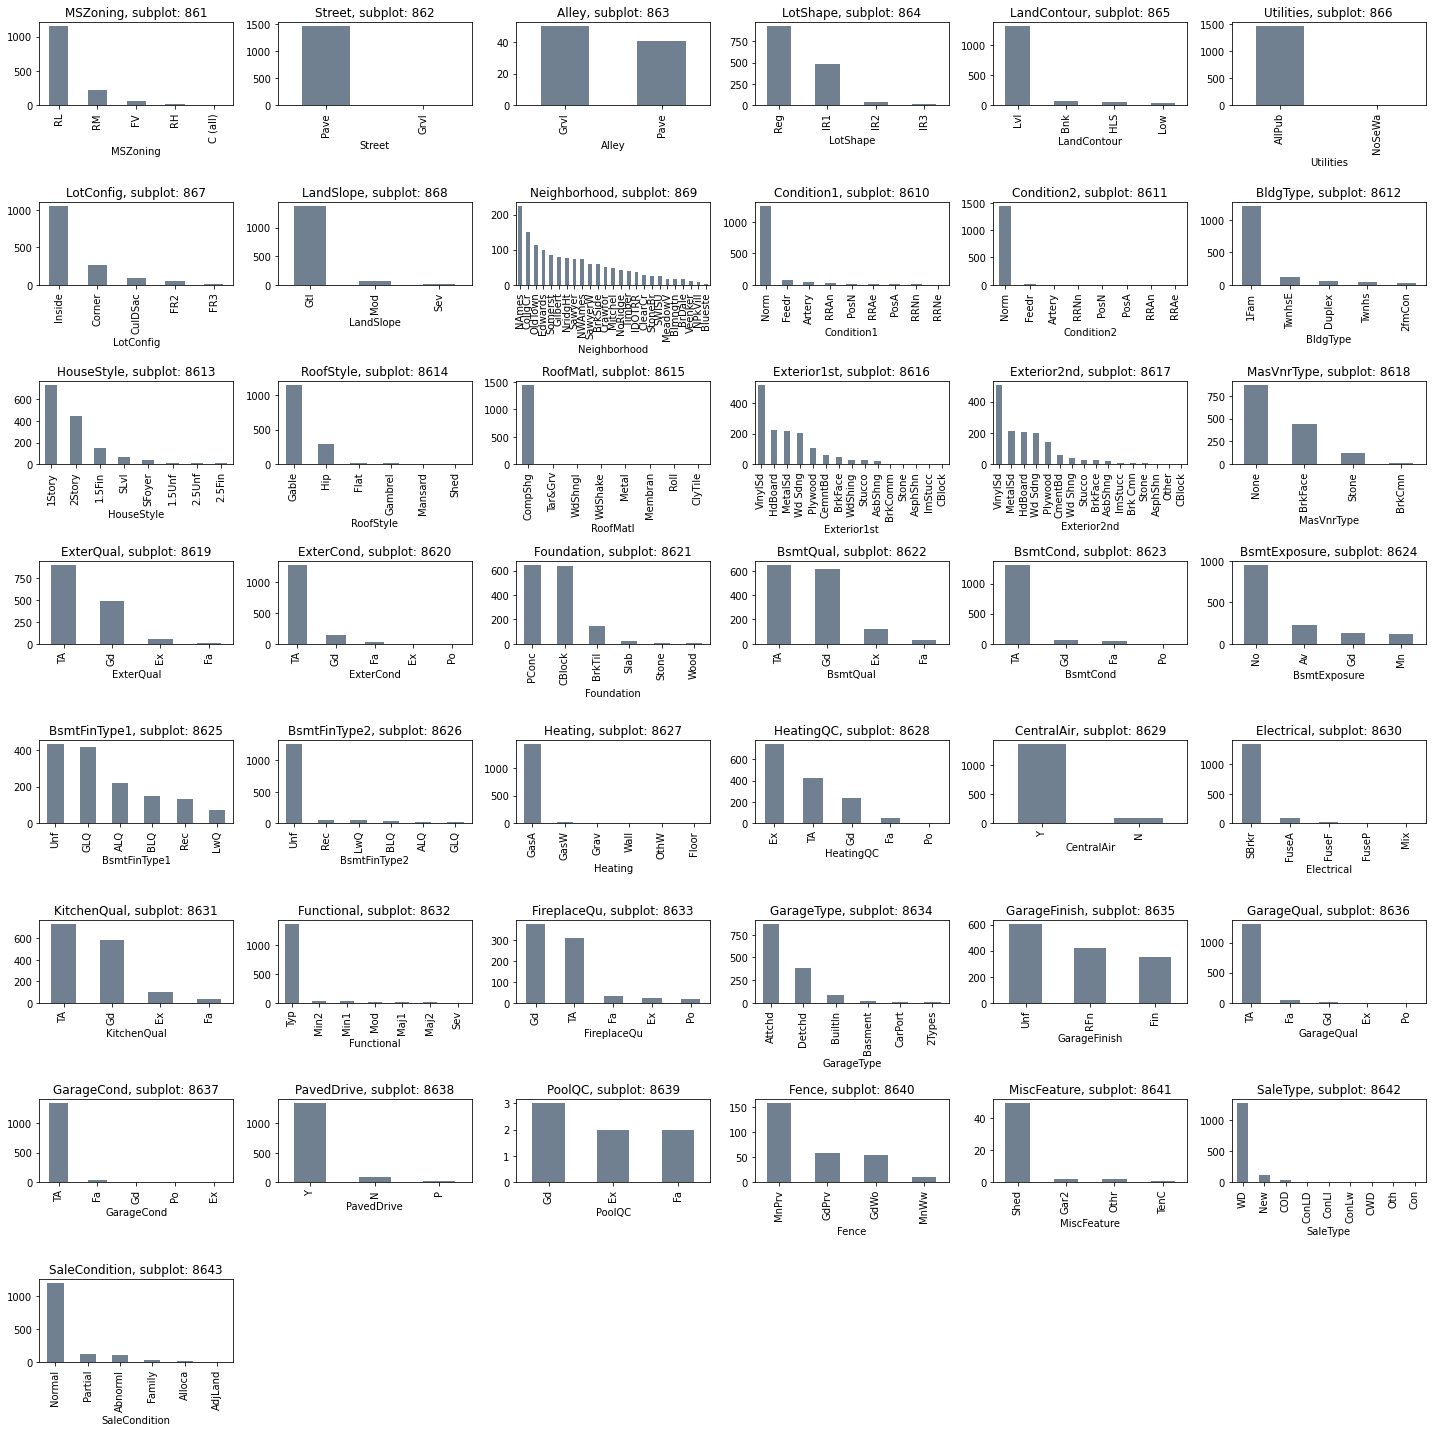

In [116]:
# Destribution of categoric variables

a = 8  # number of rows
b = 6  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,20))

for col in train[categoric]:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(col, a, b, c))
    plt.xlabel(col)
    #plt.hist(x=train[col], color='grey')
    #sns.displot(data=train, x=col, kde=False, lw=0, alpha=0.3)
    train[col].value_counts().plot(kind="bar", color = 'slategray')
    
    
    c = c + 1
plt.tight_layout()
plt.show()

In [117]:
# Ten most correlated numerical features with SalePrice
# we are using spearman correlation as it better fallows the trend

corr = train.corr(method='spearman')
corr.sort_values(by='SalePrice', ascending=False, inplace=True)
print(corr.SalePrice.head(10))

SalePrice      1.000000
OverallQual    0.809829
GrLivArea      0.731310
GarageCars     0.690711
YearBuilt      0.652682
GarageArea     0.649379
FullBath       0.635957
TotalBsmtSF    0.602725
GarageYrBlt    0.593788
1stFlrSF       0.575408
Name: SalePrice, dtype: float64


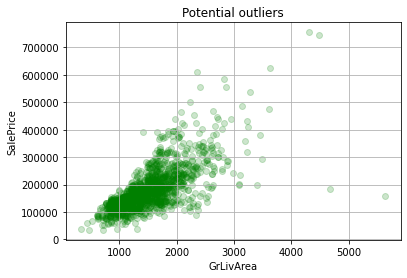

In [118]:
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

plt.scatter(train.GrLivArea, train.SalePrice, c = "green", alpha=0.2)
plt.title("Potential outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

In [119]:
# Documentation suggests removing outliers with garage area above 4000 square feets
# 4 observation would be discarded

train = train[train['GrLivArea'] < 4000]

In [120]:
print(len(train))
print(len(test))

1456
1459


### Dataset Transformation Version 1
* Use the concat Ames daframe to apply to both train and test

In [121]:
Ames=pd.concat([train.drop(['SalePrice'],axis=1),test])

<AxesSubplot:>

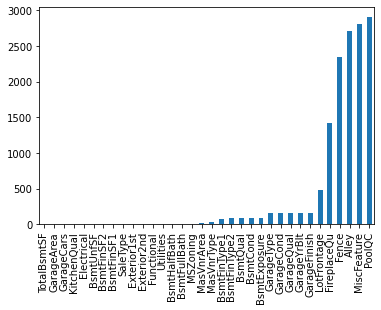

In [122]:
# Cheking for null values of te concat dataframe

null = Ames.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.bar()

In [123]:
# Apply changes

# Missing values
Ames.MasVnrArea = Ames.MasVnrArea.replace(np.NaN, Ames.MasVnrArea.median())
Ames.MSZoning = Ames.MSZoning.replace(np.NaN, Ames.MSZoning.mode()[0]) 
Ames.MasVnrType = Ames.MasVnrType.replace(np.NaN, Ames.MasVnrType.mode()[0]) 
Ames.BsmtFinSF1 = Ames.BsmtFinSF1.replace(np.NaN, Ames.BsmtFinSF1.median())
Ames.BsmtFinSF2 = Ames.BsmtFinSF2.replace(np.NaN, Ames.BsmtFinSF2.median()) 
Ames.BsmtUnfSF = Ames.BsmtUnfSF.replace(np.NaN, Ames.BsmtUnfSF.median()) 
Ames.TotalBsmtSF = Ames.TotalBsmtSF.replace(np.NaN, Ames.TotalBsmtSF.median()) 
Ames.KitchenQual = Ames.KitchenQual.replace(np.NaN, Ames.KitchenQual.mode()[0]) 
Ames.Utilities = Ames.Utilities.replace(np.NaN, Ames.Utilities.mode()[0])
Ames.Functional =  Ames.Functional.replace(np.NaN, Ames.Functional.mode()[0]) 
Ames.BsmtFullBath = Ames.BsmtFullBath.replace(np.NaN, Ames.BsmtFullBath.median())
Ames.BsmtHalfBath = Ames.BsmtHalfBath.replace(np.NaN, Ames.BsmtHalfBath.median())
Ames.Exterior2nd = Ames.Exterior2nd.replace(np.NaN, Ames.Exterior2nd.mode()[0]) 
Ames.Exterior1st = Ames.Exterior1st.replace(np.NaN, Ames.Exterior1st.mode()[0])
Ames.SaleType = Ames.SaleType.replace(np.NaN, Ames.SaleType.mode()[0]) 
Ames.GarageCars = Ames.GarageCars.replace(np.NaN, Ames.GarageCars.median())
Ames.GarageArea = Ames.GarageArea.replace(np.NaN, Ames.GarageArea.median()) 
Ames.TotalBsmtSF = Ames.TotalBsmtSF.replace(np.NaN, Ames.TotalBsmtSF.median())

Ames = Ames.fillna({'PoolQC': 'None',
                        'MiscFeature': 'None',
                        'Alley': 'None',
                        'Fence': 'None',
                        'FireplaceQu': 'None',
                        'LotFrontage': 0,
                        'GarageYrBlt': 0,
                        'GarageType': 'None',
                        'GarageFinish': 'None',
                        'GarageQual': 'None',
                        'GarageCond': 'None',
                        'BsmtFinType2': 'None',
                        'BsmtExposure': 'None',
                        'BsmtFinType1': 'None',
                        'BsmtCond': 'None',
                        'BsmtQual': 'None',
                        'Electrical': 'Unknown'})

# Encoding
Ames = Ames.replace({'MSSubClass':{20: 'A', 30: 'B', 40: 'C', 45: 'D',	50: 'E', 60: 'F', 70: 'G',	
                        75: 'H', 80: 'I', 85: 'J', 90: 'K', 120: 'L', 150: 'M', 160: 'N', 180: 'O', 190: 'P'},
                        'Street': {'Pave': 1, 'Grvl': 0},
                        'Alley': {'Pave': 2, 'Grvl': 1, 'None': 0},
                        'LotShape': {'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0},
                        'LandContour': {'Lvl': 3, 'Bnk': 2, 'HLS': 1, 'Low': 0},
                        'Utilities': {'AllPub': 1, 'NoSeWa': 0},
                        'LotConfig': {'Inside': 4, 'Corner': 3, 'CulDSac': 2, 'FR2': 1, 'FR3': 0},
                        'LandSlope': {'Gtl': 2, 'Mod': 1, 'Sev':0},
                        'ExterQual': {'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po':0},
                        'ExterCond': {'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po':0},
                        'BsmtQual': {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po':1, 'None':0},
                        'BsmtCond': {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po':1, 'None':0},
                        'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0},
                        'BsmtExposure': {'Gd': 4, 'Av': 3,'Mn': 2, 'No': 1, 'None': 0}, 
                        'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
                        'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
                        'HeatingQC': {'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po':0},
                        'CentralAir': {'Y': 1, 'N':0},
                        'KitchenQual': {'Ex': 3,'Gd': 2,'TA': 1,'Fa': 0},
                        'FireplaceQu': {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po':1, 'None': 0},
                        'GarageQual': {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po':1, 'None': 0},
                        'GarageCond': {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po':1, 'None': 0},
                        'PavedDrive': { 'Y': 2, 'P': 1, 'N': 0},
                        'PoolQC': {'Ex': 3,'Gd': 2,'Fa': 1, 'None': 0},
                        'Fence': {'GdPrv': 4,'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'None': 0},
                        'Functional': {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4, 'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}
                        })

# Simplifiying
Ames.SaleType = [1 if x == 'WD' else 0 for x in Ames.SaleType]
Ames.SaleCondition = [1 if x == 'Normal' else 0 for x in Ames.SaleCondition]

# New features
Ames['OverallScore'] = Ames.OverallCond * Ames.OverallQual
Ames['PoolQual'] = Ames.PoolArea * Ames.PoolQC
Ames['Porch'] = Ames.WoodDeckSF * Ames.OpenPorchSF * Ames.EnclosedPorch * Ames['3SsnPorch'] * Ames.ScreenPorch
Ames['GarageScore'] = Ames.GarageArea * Ames.GarageCars * Ames.GarageCond * Ames.GarageFinish * Ames.GarageQual * Ames.GarageYrBlt * Ames.GrLivArea
Ames['ExternalScore'] = Ames.ExterCond * Ames.ExterQual
Ames['BsmScore'] = Ames.BsmtCond * Ames.BsmtQual
Ames['FireplaceScore'] = Ames.Fireplaces * Ames.FireplaceQu
Ames['FlrSF'] = Ames['1stFlrSF'] + Ames['2ndFlrSF']
# Because we have half bath we're counting them as 0,5 value of a full bath
Ames['Bathrooms'] = Ames['FullBath'] + Ames['BsmtFullBath'] + 0.5 * Ames['HalfBath'] + 0.5 * Ames['BsmtHalfBath']

# Drop original features
Ames.drop(['OverallCond', 'OverallQual', 'PoolArea', 'PoolQC', 'WoodDeckSF', 'OpenPorchSF',
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'GarageArea', 'GarageCars', 'GarageCond', 
            'GarageFinish', 'GarageQual', 'GarageYrBlt', 'GrLivArea', 'ExterCond', 'ExterQual', 'BsmtCond', 
            'BsmtQual', 'Fireplaces', 'FireplaceQu', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BsmtFullBath',
            'HalfBath', 'BsmtHalfBath'], axis=1, inplace=True)

# Apply log to skewed features
skewness = Ames.select_dtypes(np.number).apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
skewed_features = skewness.index
Ames[skewed_features] = Ames[skewed_features] + 1
Ames[skewed_features] = np.log(Ames[skewed_features])

In [124]:
# Cheking for null values, again

null = Ames.isnull().sum()
null = null[null > 0]
null

Series([], dtype: int64)

In [125]:
categoric = [f for f in Ames.columns if Ames.dtypes[f] == 'object']
Ames_dummies = pd.get_dummies(Ames[categoric])
Ames = pd.concat([Ames, Ames_dummies], axis=1)
Ames.drop(categoric, axis=1, inplace=True)

In [126]:
Ames.head()


,Id,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_Gar2,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,1,65.0,9.042040,0.693147,0.0,1.386294,1.386294,0.693147,1.609438,1.098612,...,0,0,0,0,0,0,1,0,0,0
1,2,80.0,9.169623,0.693147,0.0,1.386294,1.386294,0.693147,0.693147,1.098612,...,0,0,0,0,0,0,1,0,0,0
2,3,68.0,9.328212,0.693147,0.0,1.098612,1.386294,0.693147,1.609438,1.098612,...,0,0,0,0,0,0,1,0,0,0
3,4,60.0,9.164401,0.693147,0.0,1.098612,1.386294,0.693147,1.386294,1.098612,...,0,0,0,1,0,0,1,0,0,0
4,5,84.0,9.565284,0.693147,0.0,1.098612,1.386294,0.693147,0.693147,1.098612,...,0,0,0,0,0,0,1,0,0,0


### Separation of train and test

In [127]:
train_samples = len(train)

In [128]:
# Return data to train and test
df_train = Ames[:train_samples]

df_test = Ames[train_samples:]


In [129]:
df_train.set_index('Id', drop=True, inplace=True)

In [130]:
df_test.set_index('Id', drop=True, inplace=True)

In [131]:
y = train[['SalePrice']] #.set_index(train['Id'], drop=True, inplace=True)

In [132]:
y.index = np.arange(1, len(train)+1) 

In [133]:
y = np.log(y.SalePrice)

### Running some models

In [134]:
# Separate train dataset in train and test dataset

X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.3, random_state=seed)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.3, random_state=seed)

In [136]:
# Linear Regression

lr = LinearRegression().fit(X_train, y_train)
y_preds = lr.predict(X_test)

print('score:', r2_score(y_test, y_preds))
print('RMSE:', round(mean_squared_error(y_test, y_preds, squared=False), 4))

score: 0.9019013980659706
RMSE: 0.1206


In [137]:
# RandomForestRegressor

forest_model = RandomForestRegressor(random_state=seed)
parameters = {'n_estimators': [100, 500, 1000], 'max_depth': [5, 10, 15, 20], 'min_samples_split': [2, 50, 100]}

clf_random_f = GridSearchCV(forest_model, parameters, cv = 3, n_jobs=-1).fit(X_train, y_train)
clf_random_f.fit(X_train, y_train)
y_preds = clf_random_f.predict(X_test)

print('score:', r2_score(y_test, y_preds))
print('RMSE:', round(mean_squared_error(y_test, y_preds, squared=False), 4))

score: 0.865590397701054
RMSE: 0.1412


In [138]:
# GradientBoostingRegressor

GBR = GradientBoostingRegressor(random_state=seed)
parameters = {'learning_rate': [0.01, 0.03, 0.05], 'n_estimators': [100, 500, 1000], 'max_depth': [5, 10, 15, 20]}

GBR_f = GridSearchCV(GBR, parameters, cv = 3, n_jobs=-1).fit(X_train, y_train)
GBR_f.fit(X_train, y_train)
y_preds = GBR_f.predict(X_test)

print('score:', r2_score(y_test, y_preds))
print('RMSE:', round(mean_squared_error(y_test, y_preds, squared=False), 4))

score: 0.8882033781195464
RMSE: 0.1288


In [139]:
# Ridge

parameters = [{ 'alpha': [0.5, 1, 1.5, 2]}]
grid_search = GridSearchCV(estimator = Ridge(random_state=seed), param_grid = parameters, cv = 3, n_jobs = -1)

grid_search.fit(X_train, y_train)
y_preds = grid_search.predict(X_test)

print('score:', r2_score(y_test, y_preds))
print('RMSE:', round(mean_squared_error(y_test, y_preds, squared=False), 4))

score: 0.9059426186679972
RMSE: 0.1181


In [140]:
# XGBRegressor

reg = xgb.XGBRegressor()
reg.fit(X_train, y_train)
y_preds = reg.predict(X_test)

print('score:', r2_score(y_test, y_preds))
print('RMSE:', round(mean_squared_error(y_test, y_preds, squared=False), 4))

score: 0.8725155742659885
RMSE: 0.1375


In [141]:
# LGBMRegressor

reg = LGBMRegressor()
reg.fit(X_train, y_train)
y_preds = reg.predict(X_test)

print('score:', r2_score(y_test, y_preds))
print('RMSE:', round(mean_squared_error(y_test, y_preds, squared=False), 4))

score: 0.8780359628649619
RMSE: 0.1345


In [142]:
# Lasso Regression

parameters = [{'alpha': [0.0005,0.0006,0.0007,0.0008,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.1,0.2,0.3,0.4]}]
grid_search = GridSearchCV(estimator = Lasso(random_state=seed), param_grid = parameters, cv = 3, n_jobs = -1)

grid_search.fit(X_train, y_train)
y_preds = grid_search.predict(X_test)

print('score:', r2_score(y_test, y_preds))
print('RMSE:', round(mean_squared_error(y_test, y_preds, squared=False), 4))

score: 0.9104823501995494
RMSE: 0.1152


### Submission

In [143]:
# Test Model on the Test data
predicted_prices = (np.exp(grid_search.predict(df_test)))
print("Predicted Prices :",predicted_prices)

Predicted Prices : [108126.18024238 158035.1753419  177330.13114953 ... 173008.22389132
 120238.31633624 220847.20327172]


In [144]:
my_submission = pd.DataFrame(columns= ['Id', 'SalePrice'])
my_submission['Id'] = df_test.index
my_submission['SalePrice'] = predicted_prices
# you could use any filename. We choose submission here
my_submission.to_csv('Ames_submission.csv', index=False)